In [4]:
# import necessary libraries for Data Cleaning, Transformation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load the Data using read_csv
df=pd.read_csv('/content/supermarket_sales .csv')

In [6]:
# check the data
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
#  check dataframe shape - (No.of Rows, No.of Columns)
df.shape

(1000, 17)

In [8]:
# info of DataFrame- Column Names, Data Types, Counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
# Brief description of Numerical Columns
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [10]:
# Check for any duplicate data
df.duplicated().sum()

np.int64(0)

In [11]:
# Combine 'Date' and 'Time' columns into a new 'DateTime' column
df['DateTime'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)

# Convert the 'DateTime' column to datetime objects
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [12]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DateTime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00


In [13]:
print(df['DateTime'].dtype)

datetime64[ns]


## Identifying the Top Performing Branches

In [14]:
# Grouping the Total Sales Amount by Branch with groupby()
df.groupby('Branch')['Total'].sum()

,Total
Branch,
A,106200.3705
B,106197.6720
C,110568.7065


Branch C have the highest total sales

Bar-chart of Total Sales by Branch

/tmp/ipython-input-15-2907997846.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Branch', y='Total', data=branch_sales, palette='Blues') # Use the grouped data and specify columns


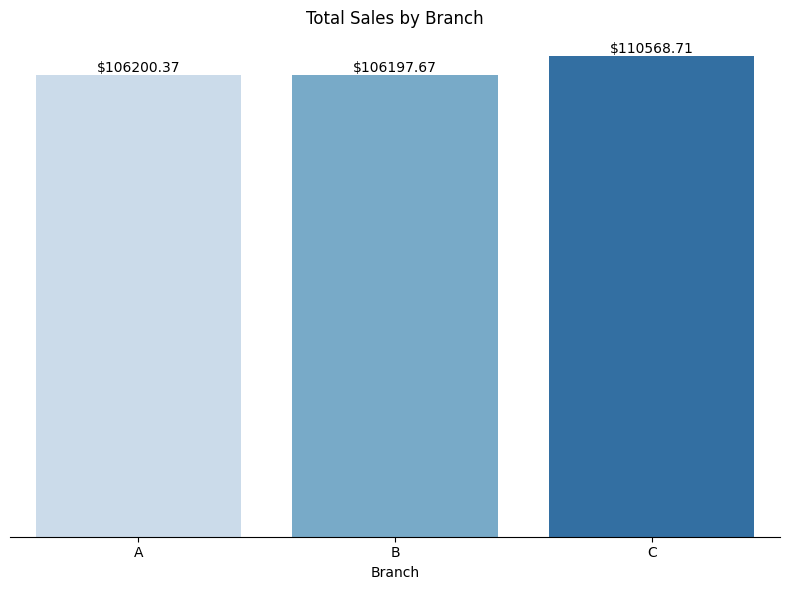

In [15]:
# Group data by branch and calculate total sales
branch_sales = df.groupby('Branch')['Total'].sum().reset_index() # reset_index() is needed for seaborn

# Create the bar chart using seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Branch', y='Total', data=branch_sales, palette='Blues') # Use the grouped data and specify columns

plt.xlabel('Branch')
plt.ylabel('')
plt.title('Total Sales by Branch')

# Label the sales data on the bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Hide the y-axis tick labels
ax.set_yticklabels([])
# Hide the y-axis tick marks
ax.set_yticks([])

# Just show 2 sidelines left, bottom
plt.gca().spines[['top', 'right', 'left']].set_visible(False)
plt.tight_layout()
plt.show()

## Analyzing whether members spend more or normal customers??

### Calculate the Average Spent by Customer Type

In [16]:
df.groupby('Customer type')['Total'].mean()

,Total
Customer type,
Member,327.791305
Normal,318.122856


Visual Display of Average Purchase Amount by Customer Type

/tmp/ipython-input-17-1036097147.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Customer type', y='Total', data=customer_type_avg_purchase, palette='Blues') # Using a different palette


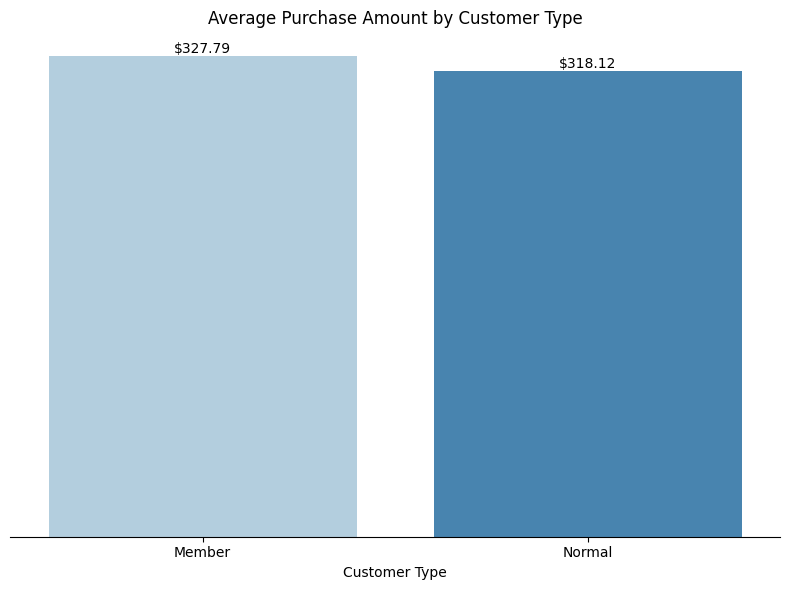

In [17]:
# Group data by customer type and calculate the mean of 'Total'
customer_type_avg_purchase = df.groupby('Customer type')['Total'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Customer type', y='Total', data=customer_type_avg_purchase, palette='Blues') # Using a different palette

plt.xlabel('Customer Type')
# Remove the y-axis label
ax.set_ylabel('')
plt.title('Average Purchase Amount by Customer Type')

# Label the average purchase amount on the bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Hide the y-axis tick labels
ax.set_yticklabels([])
# Hide the y-axis tick marks
ax.set_yticks([])

# Just show 2 sidelines left, bottom
plt.gca().spines[['top', 'right', 'left']].set_visible(False)
plt.tight_layout()
plt.show()

## Identifying Top Performing Products

### Calculate Total Sales by Product line and sorting them from Highest to Lowest

In [18]:
df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

,Total
Product line,
Food and beverages,56144.8440
Sports and travel,55122.8265
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Home and lifestyle,53861.9130
Health and beauty,49193.7390


Horizontal Bar chart for better understanding

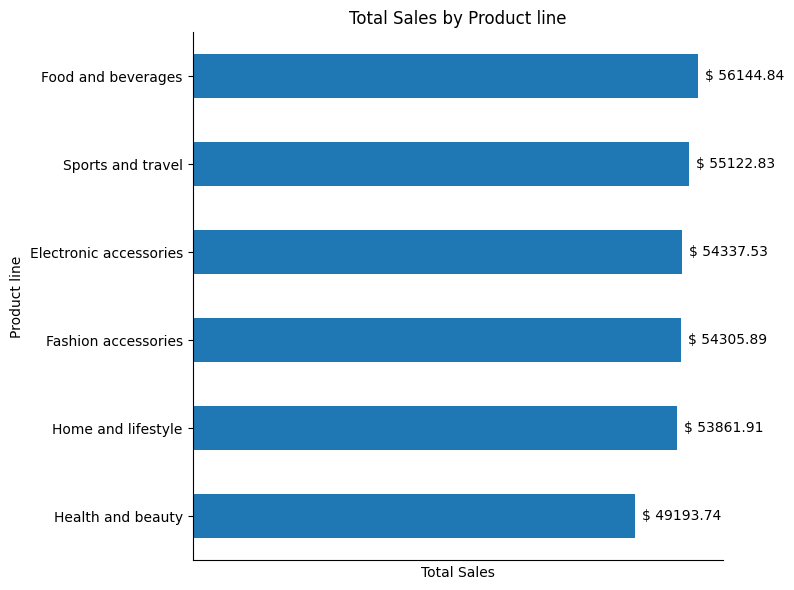

In [19]:
# Group data by Product lines and calculate total sales and sort them greatest to least
product_line_sales = df.groupby('Product line')['Total'].sum().sort_values(ascending=True)

# Create the bar chart
plt.figure(figsize=(8, 6))
ax = product_line_sales.plot(kind='barh')
plt.ylabel('Product line')
plt.xlabel('Total Sales')
plt.title('Total Sales by Product line')
plt.xticks(rotation=0)

# Label the sales data on the bar at the end
for p in ax.patches:
    ax.annotate(f'$ {p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
ax.set_xticklabels([])
ax.set_xticks([])

# Just show 2 sidelines left, bottom
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

## Evaluating Customer Satisfaction using Histogram based Customer Ratings Distribution

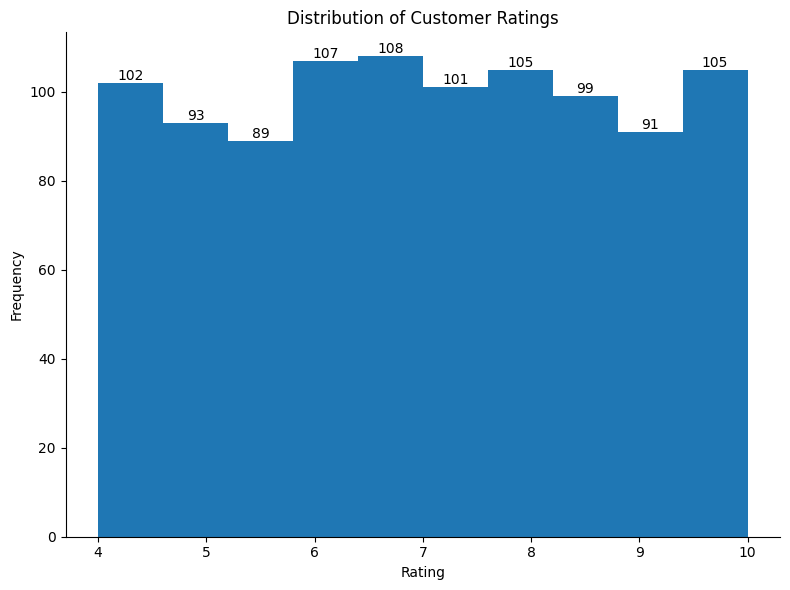

In [20]:
# Create the histogram
fig, ax = plt.subplots(figsize=(8, 6)) # Create figure and axes explicitly
n, bins, patches = ax.hist(df['Rating'], bins=10, color= sns.set_palette('Blues')) # Get histogram data and patches

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Ratings')

# Label the frequency on each bar
# data labels
for p in ax.patches:
  ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{int(p.get_height())}', ha = 'center', va = 'bottom')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()